In [1]:
import pandas as pd
import numpy as np
from matplotlib import rc
from matplotlib import pyplot as plt
import seaborn as sns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
basic_df = pd.read_csv('GP_basic_3개년.csv',index_col=0)

In [3]:
df = pd.read_csv('GP_취업관련_3개년.csv',index_col=0)

In [4]:
explore_df = pd.concat((basic_df.iloc[:,:-1], df), axis=1)

In [5]:
employ_df = explore_df[explore_df['취업여부']==1]

In [6]:
employ_df.columns

Index(['본분교', '국공사립', '주야간', '전공계열', '전공_소분류_코드', '전공_세분류_코드', '학교유형',
       '학교소재지역', '성별', '연령', '취업여부', '산업분류', '직업분류', '직원수', '사업체위치(시도)',
       '종사상 지위', '정규직여부', '인턴경험여부(현직장)', '근로소득(현재_월_만원)', '근로소득(초임_월_만원)',
       '구직기간(주)', '구직경로', '구직방법', '신입여부', '취업_중요요소_1순위', '취업_중요요소_2순위',
       '조사년도'],
      dtype='object')

---


## 전체 취업자 직장 분류

In [7]:
employ_df['직업분류'].value_counts().sort_index()

0.0      525
1.0       48
2.0     9753
3.0      951
11.0      68
12.0     694
13.0    2194
14.0    1364
15.0    3260
21.0    2897
22.0     143
23.0    1178
24.0     206
25.0     713
30.0    2925
41.0    2658
42.0     360
51.0     170
52.0     317
53.0    1113
54.0     154
55.0      67
56.0     106
61.0    2322
62.0     372
70.0     182
81.0     941
82.0     106
83.0     733
84.0      84
85.0     247
86.0      31
87.0     127
88.0     113
89.0      46
90.0     245
Name: 직업분류, dtype: int64

In [8]:
# 한국표준직업분류
job_category = employ_df['직업분류'].value_counts().sort_index()

In [9]:
job_category.index = ['모름/무응답','관리직(임원·부서장)','경영·행정·사무직','금융·보험직','인문·사회과학 연구직','자연·생명과학 연구직','정보통신 연구개발직 및 공학기술직','건설·채굴 연구개발직 및 공학기술직','제조 연구개발직 및 공학기술직','교육직','법률직','사회복지·종교직','경찰·소방·교도직','군인','보건·의료직','예술·디자인·방송직','스포츠·레크리에이션직','미용·예식 서비스직','여행·숙박·오락 서비스직','음식 서비스직','경호·경비직','돌봄 서비스직(간병·육아)','청소 및 기타 개인서비스직','영업·판매직','운전·운송직','건설·채굴직','기계 설치·정비·생산직','금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)','전기·전자 설치·정비·생산직','정보통신 설치·정비직','화학·환경 설치·정비·생산직','섬유·의복 생산직','식품 가공·생산직','인쇄·목재·공예 및 기타 설치·정비·생산직','제조 단순직','농림어업직']

In [10]:
job = job_category.sort_values()
job

섬유·의복 생산직                              31
제조 단순직                                 46
관리직(임원·부서장)                            48
돌봄 서비스직(간병·육아)                         67
인문·사회과학 연구직                            68
정보통신 설치·정비직                            84
금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)     106
청소 및 기타 개인서비스직                        106
인쇄·목재·공예 및 기타 설치·정비·생산직               113
식품 가공·생산직                             127
법률직                                   143
경호·경비직                                154
미용·예식 서비스직                            170
건설·채굴직                                182
경찰·소방·교도직                             206
농림어업직                                 245
화학·환경 설치·정비·생산직                       247
여행·숙박·오락 서비스직                         317
스포츠·레크리에이션직                           360
운전·운송직                                372
모름/무응답                                525
자연·생명과학 연구직                           694
군인                                    713
전기·전자 설치·정비·생산직                   

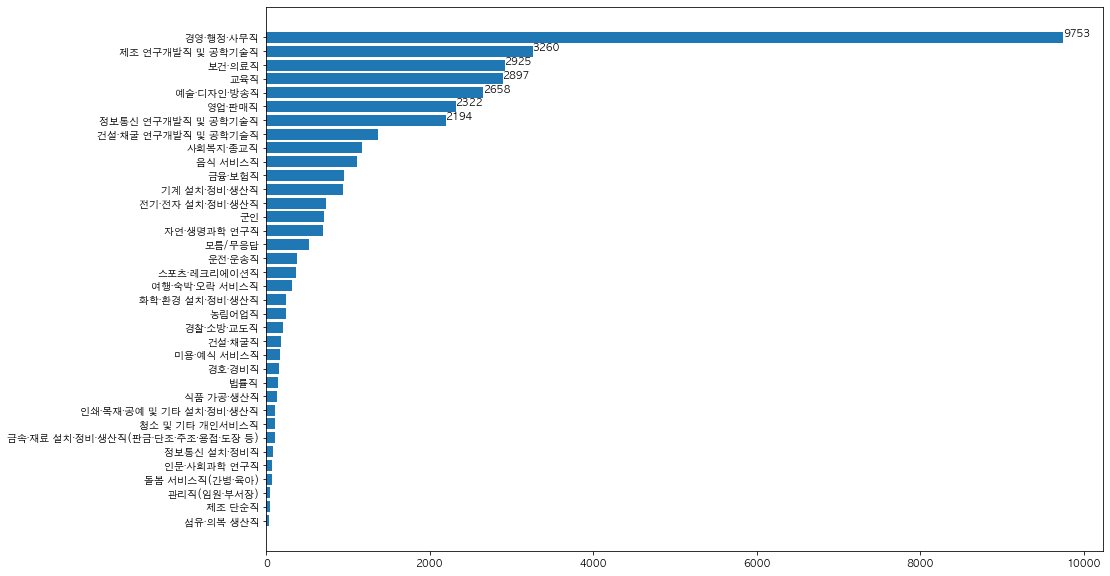

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.barh(job.index, job)

for i in range(1,8):
    plt.text(job[-i],job.index[-i], job[-i], verticalalignment='baseline', horizontalalignment='left')

plt.show()

---

## 직장 분류에 따른 근로소득

In [12]:
# 직업분류에 모름/무응답(인데 급여는 작성해놓은 경우)은 제외
employ_df = employ_df[(employ_df['직업분류'] != 0) | (employ_df['근로소득(현재_월_만원)'] == 0)]

/opt/homebrew/Caskroom/miniforge/base/envs/multi_crawling/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='근로소득(현재_월_만원)'>

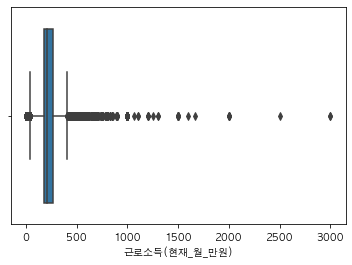

In [13]:
sns.boxplot(employ_df['근로소득(현재_월_만원)']) 

In [14]:
iqr = employ_df['근로소득(현재_월_만원)'].quantile(0.75) - employ_df['근로소득(현재_월_만원)'].quantile(0.25)

In [15]:
max = employ_df['근로소득(현재_월_만원)'].quantile(0.75)+(1.5*iqr)
min = employ_df['근로소득(현재_월_만원)'].quantile(0.25)-(1.5*iqr)

In [16]:
# 이상치 (과다)
employ_df[employ_df['근로소득(현재_월_만원)'] > max].shape

(1498, 27)

In [17]:
# 이상치 (과소)
employ_df[employ_df['근로소득(현재_월_만원)'] <= min].shape

(1078, 27)

In [18]:
job_category_describe = employ_df.groupby('직업분류')['근로소득(현재_월_만원)'].agg([['평균', 'mean'], ['중간값', 'median'], ['최소', 'min'], ['최대', 'max']])
job_category_describe.index = ['모름/무응답','관리직(임원·부서장)','경영·행정·사무직','금융·보험직','인문·사회과학 연구직','자연·생명과학 연구직','정보통신 연구개발직 및 공학기술직','건설·채굴 연구개발직 및 공학기술직','제조 연구개발직 및 공학기술직','교육직','법률직','사회복지·종교직','경찰·소방·교도직','군인','보건·의료직','예술·디자인·방송직','스포츠·레크리에이션직','미용·예식 서비스직','여행·숙박·오락 서비스직','음식 서비스직','경호·경비직','돌봄 서비스직(간병·육아)','청소 및 기타 개인서비스직','영업·판매직','운전·운송직','건설·채굴직','기계 설치·정비·생산직','금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)','전기·전자 설치·정비·생산직','정보통신 설치·정비직','화학·환경 설치·정비·생산직','섬유·의복 생산직','식품 가공·생산직','인쇄·목재·공예 및 기타 설치·정비·생산직','제조 단순직','농림어업직']
job_category_describe

,평균,중간값,최소,최대
모름/무응답,0.000000,0.0,0.0,0.0
관리직(임원·부서장),554.916667,445.0,180.0,2500.0
경영·행정·사무직,233.213780,215.0,0.0,3000.0
금융·보험직,314.791798,300.0,100.0,1200.0
인문·사회과학 연구직,216.647059,200.0,0.0,500.0
자연·생명과학 연구직,185.417867,180.0,10.0,500.0
정보통신 연구개발직 및 공학기술직,249.568824,230.0,0.0,750.0
건설·채굴 연구개발직 및 공학기술직,245.684751,230.0,0.0,1500.0
제조 연구개발직 및 공학기술직,258.381595,250.0,0.0,833.0
교육직,198.173973,200.0,0.0,1500.0


In [19]:
employ_df.groupby(['조사년도','직업분류'])['근로소득(현재_월_만원)'].agg([['평균', 'mean'], ['중간값', 'median'], ['최소', 'min'], ['최대', 'max']])

평균    중간값     최소      최대
조사년도 직업분류                                  
2016 0.0     0.000000    0.0    0.0     0.0
     1.0   529.523810  500.0  200.0  1000.0
     2.0   220.622480  200.0    0.0  1000.0
     3.0   293.625786  270.0  100.0   750.0
     11.0  194.857143  180.0  150.0   280.0
...               ...    ...    ...     ...
2018 86.0  194.375000  200.0   70.0   300.0
     87.0  221.129032  200.0  100.0   500.0
     88.0  265.395349  200.0   50.0  2000.0
     89.0  131.142857  149.0    0.0   280.0
     90.0  312.722892  220.0    0.0  1000.0

[108 rows x 4 columns]